https://github.com/shivam1808/Recommendation-System

https://medium.com/@deepapandithu/recommender-system-user-collaborative-filtering-37613f0c6a9

In [ ]:
# cosine similarity
# uses the angle between 2 lines
# higher value = more similar
# max value is 1, when angle is 0 degree krn artiny 2 items itu mirip bgt atau persis sama 

# to use ; noemalize all features dulu before applying cosine
# from sklearn.preprocessing import normalize
# norm_features = normalize(nmf_features)
# current_article = norm_features[23, : ]
# similarities = noem_features.dot(current_article)
# # similarities = cosine similarity
# print(similarities.n_largest())


### Combine Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
files = ['master_data.csv', 'master_data1.csv', 'master_data2.csv',
         'master_data3.csv', 'master_data4.csv', 'master_data5.csv',
         'master_data6.csv', 'master_data7.csv', 'master_data8.csv',
         'master_data9.csv', 'master_data10.csv', 'master_data11.csv',
         'master_data12.csv', 'master_data13.csv', 'master_data14.csv',
         'master_data15.csv', 'master_data16.csv', 'master_data17.csv',
         'master_data18.csv', 'master_data19.csv', 'master_data20.csv',
         'master_data21.csv', 'master_data22.csv', 'master_data23.csv',
         'master_data24.csv', 'master_data25.csv', 'master_data26.csv',
         'master_data27.csv', 'master_data28.csv', 'master_data29.csv',
         'master_data30.csv', 'master_data31.csv', 'master_data32.csv',
         'master_data33.csv', 'master_data34.csv', 'master_data35.csv',
         'master_data36.csv', 'master_data37.csv', 'master_data38.csv',
         'master_data39.csv', 'master_data40.csv', 'master_data41.csv',
         'master_data42.csv', 'master_data43.csv', 'master_data44.csv',
         'master_data45.csv', 'master_data46.csv'
        ]

In [ ]:
df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df

In [ ]:
df.to_csv('final_data.csv')

## ITEM BASED CF

1. item -> user rating matrix
2. item -> item similarity matrix
3. look up similar items
4. candidate scoring
5. candidate filtering

1. item to user rating matrix

![Indiana Jones.png](<attachment:Indiana Jones.png>)
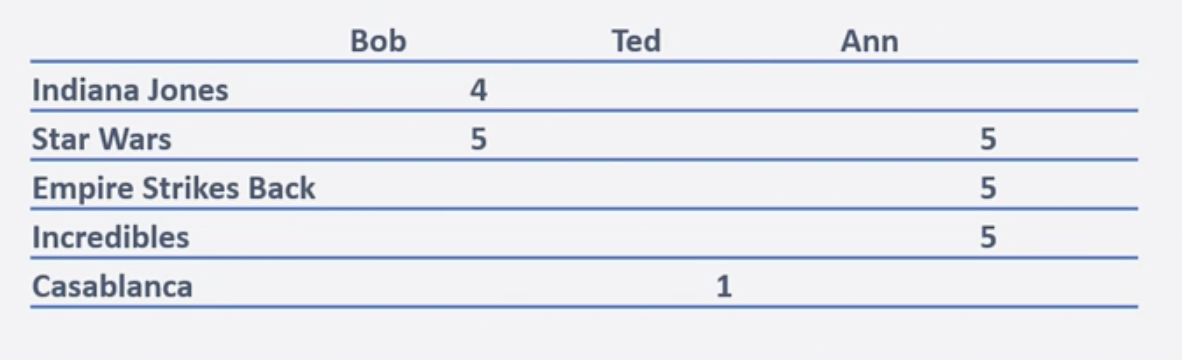

2. create item similarity matrix

finding cosine between these item vector

-1 sampai 1

![Indiana Jones.png](<attachment:Indiana Jones.png>)
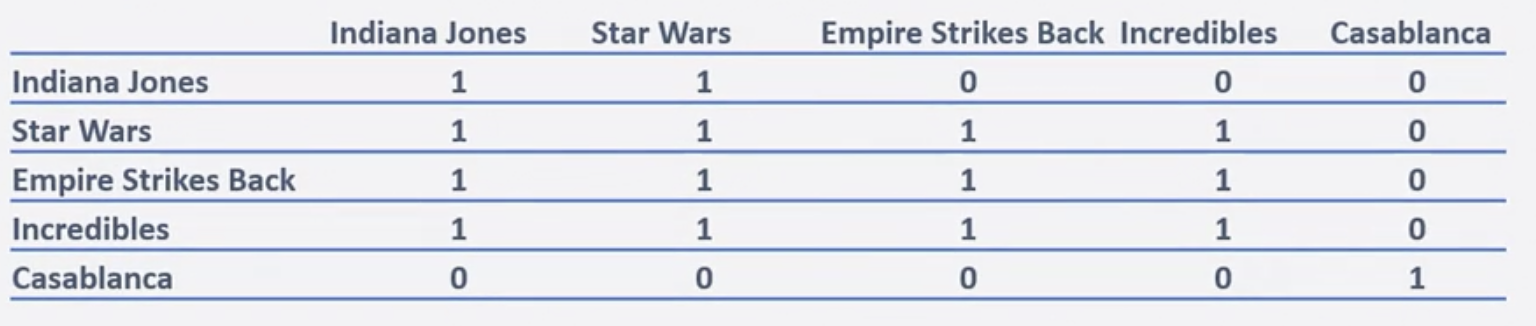

3. look up similar item to user liked item

bob likes star wars, so look up similar movie to star wars from similarity matrix

training model
data pribadi / lain
pakai model yg sudah ada, kalo item to item pakai cosine
testing : evaluasi  ke user asli ke bbrp org

![Screenshot 2025-03-12 at 00.18.31.png](<attachment:Screenshot 2025-03-12 at 00.18.31.png>)
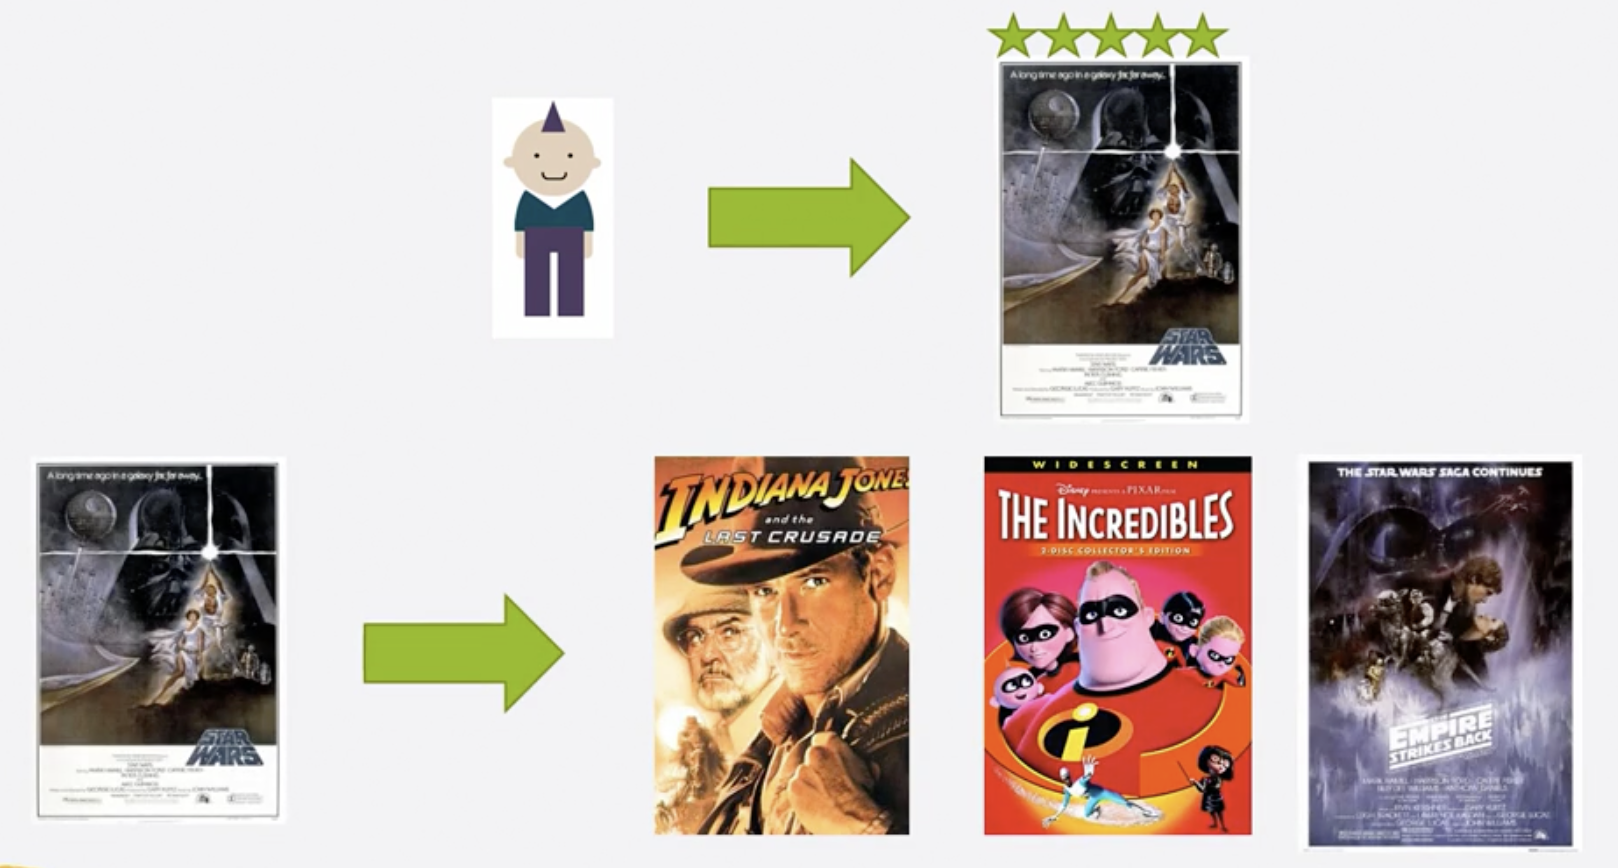

## Load Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import root_mean_squared_error
from scipy.sparse import csr_matrix

In [ ]:
df = pd.read_csv('final_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

In [ ]:
df

In [ ]:
df['Restaurant Name'].value_counts()

In [ ]:
df['Username'].value_counts()

In [ ]:
df.columns

## Data Processing

ada sedikit update stlh dicek web pergikuliner, beberapa restoran dibawah ini sudah tutup

In [ ]:
idx_hapus = df[df['Restaurant Name'] == 'Sunday Bowl Cereal Club'].index
idx_hapus = idx_hapus.union(
    df[(df['Restaurant Name'] == 'Gelato Secrets') & (df['Location'] == 'Senopati')].index
)
df = df.drop(idx_hapus).reset_index(drop=True)

In [ ]:
pricena = df[df['Price'].isna()]
price = pricena[['Restaurant Name', 'Location']].drop_duplicates()
price

In [ ]:
df = df.dropna(subset=['Price']).reset_index(drop=True)

### 1. check isna data

beberapa kolom hilang datanya saat proses scraping karena ... Untuk mengisi nya menggunakan fillna dan data kosong diambil dari website pergi kuliner langsung

In [ ]:
df.isna().sum()

In [ ]:
df[df['Restaurant Rating'].isna()]

In [ ]:
# fill isna data
fill_values = {
    'Amuz': 4.45,
    'Coco Bakehouse': 4.32,
    'Kalia': 4.28,
    'TERU' : 4.28,
    'Plataran' : 4.34,
    'The Social Pot' : 4.30,
    'Kopi Selamat Pagi' : 4.34, 
    'Okinawa Sushi' : 4.36,
    'Sushi Hiro' : 4.32,
    'Social Garden' : 4.27,
    'Fish & Chips ThreeHouse' : 4.32,
    'Olive Tree House of Croissants' : 4.27,
    'Lustre' : 4.4,
    'Blue Terrace - Hotel Ayana Midplaza Jakarta' : 4.43,
    'Bruno Cafe In The Park' : 4.42,
    'Paris Sorbet' : 4.25,
    'Blau Eatery & Coffee' : 4.35,
    'Le Gran Cafe - Hotel Gran Mahakam' : 4.24,
    'Skye' : 4.27,
    'Padang Merdeka' : 4.24,
    '2Tang 2Go' : 4.43,
    'The Writers Bar - Raffles Jakarta Hotel' : 4.37,
    'Mardin Fine Baklava Cafe' : 4.42,
    'Remboelan' : 4.28,
    'Kohai Sushi Bar' : 4.38,
    'Haiseafood' : 4.47,
    'Sugar & Spice - Hotel InterContinental Jakarta Pondok Indah' : 4.54,
    'Enmaru' : 4.21,
    'Monsieur Spoon' : 4.22,
    'Rumah Kopi Papowi' : 4.45,
    'Jia Dining - Hotel Shangri-La Jakarta' : 4.28,
    'Marutama Ra-men' : 4.21,
    'Mardin Baklava Patisserie' : 4.36,
    '/Grams Crafted Grill & Smoke' : 4.33,
    'Shabu Siy' : 4.40,
    'Coffee & Thyme' : 4.32,
    'Cafe Batavia' : 3.99,
    'Kabobs' : 3.5,
    'Dough Lab' : 4.29
}

for resto, rating in fill_values.items():
    df.loc[(df['Restaurant Name'] == resto) & (df['Restaurant Rating'].isna()), 'Restaurant Rating'] = rating

In [ ]:
# final check isna data
df.isna().sum()

### 2. Exploratory Data

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Cuisine Type'].value_counts()
# 76 cuisine category

In [ ]:
df['Username'].value_counts()
# 3382 users

In [ ]:
df['Location'].value_counts()
# yang tersebar di 90 lokasi di jakarta
# lokasi - jumlah review

In [ ]:
df['Restaurant Name'].value_counts()
# 1046 restaurants

In [ ]:
# highest rated restaurant/cafes
avg = df[['Restaurant Name', 'User Rating']].groupby(['Restaurant Name']).mean()
avg.sort_values('User Rating', ascending=False)

In [ ]:
df.head()

Visualize Data Distribution

In [ ]:
import matplotlib.pyplot as plt

# user rating dist
plt.figure(figsize=(5, 3))
plt.hist(df['User Rating'], bins=10, edgecolor='black', color='blue')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

# restaurant rating dist
plt.figure(figsize=(5, 3))
plt.hist(df['Restaurant Rating'], bins=10, edgecolor='black', color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Restaurant Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
user_rating_skew = df['User Rating'].skew()
print(f"Skewness: {user_rating_skew}")
# If skewness < 0, the distribution is negatively skewed

however, based on the visualized data, it can be seen that user rating has positive skewness\
Most ratings are on the higher end, indicating that people tend to rate positively. This is common in many review systems because people who are satisfied are more likely to leave a review.

In [ ]:
resto_rating_skew = df['Restaurant Rating'].skew()
print(f"Skewness: {resto_rating_skew}")
# If skewness > 0, the distribution is positively skewed.

In [ ]:
# save final preprocessed data
df.to_csv('final_processed_data.csv')

---

check duplicate

Handle Duplicates: Ensure there are no duplicate reviews for the same restaurant.

User Reviews: Examine the text in User Review to see if there's any processing you need to do (like removing symbols, handling mixed languages, etc.).

In [ ]:
# restaurant that should not be recommended to people : < 3 rating
not_recommended = df[df['Restaurant Rating'] < 3.9].value_counts()
print(f'There are {len(not_recommended)} restaurants that should not be recommended')

In [ ]:
# remove duplicate : 28411 -> 28091
df.drop_duplicates(inplace=True)

In [ ]:
# Normalize restaurant names (strip spaces, convert to lowercase)
df['Restaurant Name'] = df['Restaurant Name'].str.strip().str.lower()

# Convert user ratings to numeric
# df['User Rating'] = pd.to_numeric(df['User Rating'], errors='coerce')
# df.dropna(subset=['User Rating'], inplace=True)


In [ ]:
# Restaurant Name      ?
# Cuisine Type         bs
# Restaurant Rating    sudah
# Location             bs
# Price                ?
# Username             ?
# User Rating          sudah
# User Review          tidak

-------------------

In [ ]:
df

In [ ]:
data = df[['Username', 'Restaurant Name', 'User Rating']].copy()
data.head()

## CF

Collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources.Basically, it is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users.

2 CF approaches
1) Memory-Based CF - It is an approach which finds similarity between users or between items to recommend similar items. Examples include Neighbourhood-based CF and Item-based/User-based top-N recommendations.
2) Model-Based CF - In this approach we use different data mining, machine learning algorithms to predict users' rating of unrated items. Examples include Singular Value Decomposition (SVD) , Principal Component Analysis (PCA) etc.

### Memory-Based CF

2 approaches to Memory-Based CF
1) User-User Collaborative Filtering - In this we we calculate similarity of all the users to the active user ( the user whom the prediction is for ).Then sort and filter the Top-N users to make predictions for the active user. This is usually very effective but takes a lot of time and resources. For example if Dennis and Davis like the same movies and a new movie comes out that Davis likes,then we can recommend that movie to Dennis because Davis and Dennis seem to like the same movies.

2) Item-Item Collaborative Filtering - This is similar to User-User CF, just that we now compute similarity between items to recommend similar items. Eg. When you buy any product on Amazon, you will find this line "Users who bought this item also bought...", so Amazon uses item-item CF widely, Mind that I'm not saying they use only item-item CF, they have hybrid techniques to better suit users of even unique interests.

Item-Item CF are a lot faster than User-User CF. and secondly user profiles changes quickly and the entire system model has to be recomputed, whereas item's average ratings doesn't change that quickly, and this leads to more stable rating distributions in the model, so the model doesn't have to be rebuilt as often.

Similarity

1) Jaccard Similarity - It is a statistic used for comparing the similarity and diversity of sample sets. It is defined as the size of the intersection divided by the size of the union of the sample sets.
2) Cosine Similarity - It measures the angle between the ratings vector. If the angle is 0°, then they are vectors having same orientation and if the angle is 180°, then they are highly dissimilar vectors.
3) Pearson Similarity - It is actually Centered-Cosine similarity. We subtract the mean ratings from the user ratings, so that the mean is centered at 0, and then calculate the cosine similarity.

In [ ]:
df['Restaurant Name'].value_counts()

In [ ]:
df['Username'].value_counts()

## 👍 ITEM BASED CF

Item-based CF is a memory-based method. It:

Computes similarity between items (e.g., adjusted cosine)

Predicts user preferences by weighted averaging ratings from similar items

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import root_mean_squared_error
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('final_processed_data.csv')

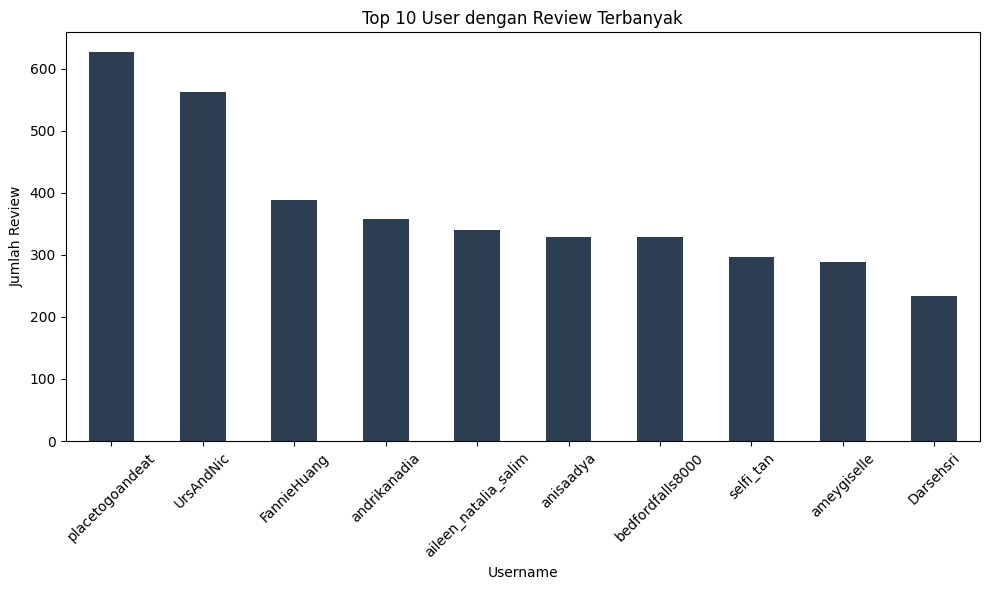

In [ ]:
top_users = user_review_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='#')
plt.title("Top 10 User dengan Review Terbanyak")
plt.xlabel("Username")
plt.ylabel("Jumlah Review")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
df

,Unnamed: 0,Restaurant Name,Cuisine Type,Restaurant Rating,Location,Price,Username,User Rating,User Review
0,0,Momo Paradise,Jepang,4.73,Kelapa Gading,Di atas Rp. 200.000 /orang,micky_ardhienoor_husin,4.8,One of my bucket list\nPenasaran pgn makan di ...
1,1,Momo Paradise,Jepang,4.73,Kelapa Gading,Di atas Rp. 200.000 /orang,rebecca_t,4.8,One of the Best Japanese Hotpot\nKayaknya Momo...
2,2,Momo Paradise,Jepang,4.73,Kelapa Gading,Di atas Rp. 200.000 /orang,foodbuddies.id,4.8,The Best Authentic Japanese Sukiyaki & Shabu-S...
3,3,Momo Paradise,Jepang,4.73,Kelapa Gading,Di atas Rp. 200.000 /orang,antihungryclub,5.0,AYCE Authentic khas Jepang\nMomo Paradise -- T...
4,4,Momo Paradise,Jepang,4.73,Kelapa Gading,Di atas Rp. 200.000 /orang,fitriahlaela,5.0,AYCE yg worth it!!\nAYCE yang menyenangkan dan...
...,...,...,...,...,...,...,...,...,...
28146,28146,Anomali Coffee,Kafe,4.46,Menteng,Rp. 50.000 - Rp. 100.000 /orang,Tissa789,3.0,Starbucks versi Indonesia\nAnomali tuh menurut...
28147,28147,Anomali Coffee,Kafe,4.46,Menteng,Rp. 50.000 - Rp. 100.000 /orang,si_zel,4.4,Tempat hang out favorit\nLokasinya yang cukup ...
28148,28148,Anomali Coffee,Kafe,4.46,Menteng,Rp. 50.000 - Rp. 100.000 /orang,Ilma,5.0,"konsepnya asik!\nBegitu masuk, kalian akan lia..."
28149,28149,Anomali Coffee,Kafe,4.46,Menteng,Rp. 50.000 - Rp. 100.000 /orang,UrsAndNic,4.0,"Homey Coffee shop\nSuka banget ambiencenya,ter..."


In [2]:
# normalize
min_rating = df['User Rating'].min()
max_rating = df['User Rating'].max()

df['Rating Normalize'] = (df['User Rating'] - min_rating) / (max_rating - min_rating)

print(f"Minimum of normalized User Rating: {df['Rating Normalize'].min()}")
print(f"Maximum of normalized User Rating: {df['Rating Normalize'].max()}")

Minimum of normalized User Rating: 0.0
Maximum of normalized User Rating: 1.0


In [5]:
rating_data_df = df[['Username', 'Restaurant Name', 'Rating Normalize']].copy()

user_encoder = LabelEncoder()
resto_encoder = LabelEncoder()

rating_data_df['User ID'] = user_encoder.fit_transform(rating_data_df['Username'])
rating_data_df['Restaurant ID'] = resto_encoder.fit_transform(rating_data_df['Restaurant Name'])

rating_data_df = rating_data_df[['User ID', 'Restaurant ID', 'Rating Normalize']]

In [6]:
rating_data_df

,User ID,Restaurant ID,Rating Normalize
0,2287,615,0.95
1,2672,615,0.95
2,1507,615,0.95
3,712,615,1.00
4,1497,615,1.00
...,...,...,...
28146,375,41,0.50
28147,2936,41,0.85
28148,160,41,1.00
28149,381,41,0.75


In [7]:
from sklearn.model_selection import train_test_split
trainval_df, test_df = train_test_split(rating_data_df, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(trainval_df, test_size=0.125, random_state=42)

print(f"Total Training Data: {len(train_df)}")
print(f"Total Validation Data: {len(val_df)}")
print(f"Total Testing Data: {len(test_df)}")
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

Total Training Data: 22168
Total Validation Data: 3167
Total Testing Data: 2816
(22168, 3)
(2816, 3)
(3167, 3)


In [8]:
# pivot untuk train aja
ratings_matrix_train = train_df.pivot_table(index='User ID', columns='Restaurant ID', values='Rating Normalize').fillna(0)

In [9]:
# adj cosine
adjusted_ratings = ratings_matrix_train.sub(ratings_matrix_train.mean(axis=1), axis=0).fillna(0)
# Convert to sparse matrix for efficiency
sparse_matrix = csr_matrix(adjusted_ratings.T.values) # Transpose untuk item-based CF
similarity_matrix = cosine_similarity(sparse_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=adjusted_ratings.columns, columns=adjusted_ratings.columns)


In [ ]:
# predict rating for each user-item pair in

def predict_rating_item_based(user, item, ratings_matrix, similarity_df, k=10):
    # find all item that have been rated in train set
    if user not in ratings_matrix.index or item not in ratings_matrix.columns:
        return np.nan
    user_ratings = ratings_matrix.loc[user]
    rated_items = user_ratings[user_ratings > 0].index
    # get similarity between target item and rated items
    similarities = similarity_df.loc[item, rated_items]
    # weighted sum for rating prediction
    ratings = user_ratings[rated_items]
    if similarities.abs().sum() == 0:
        return ratings.mean()  # fallback
    return np.dot(similarities, ratings) / (np.abs(similarities).sum() + 1e-8)
    

In [36]:
from collections import defaultdict
import numpy as np

def evaluate_all_metrics(df_split, ratings_matrix_train, similarity_df, k=10):
    preds = []
    trues = []

    user_recs = defaultdict(list)
    truth = defaultdict(list)

    for user in df_split['User ID'].unique():
        if user not in ratings_matrix_train.index:
            continue
        rated_in_train = ratings_matrix_train.loc[user]
        unrated_items = rated_in_train[rated_in_train == 0].index

        scores = []
        for item in unrated_items:
            if item not in similarity_df.index:
                continue
            pred = predict_rating_item_based(user, item, ratings_matrix_train, similarity_df)
            if not np.isnan(pred):
                scores.append((item, pred))
        top_k = sorted(scores, key=lambda x: -x[1])[:k]
        user_recs[user] = [item for item, _ in top_k]

        # Ground truth for Precision/Recall
        actual_items = df_split[df_split['User ID'] == user]['Restaurant ID'].tolist()
        truth[user] = actual_items

    # RMSE / MAE
    used_rows = 0
    for _, row in df_split.iterrows():
        user = row['User ID']
        item = row['Restaurant ID']
        true_rating = row['Rating Normalize']

        if user in ratings_matrix_train.index and item in similarity_df.index:
            pred = predict_rating_item_based(user, item, ratings_matrix_train, similarity_df)
            if not np.isnan(pred):
                preds.append(pred)
                trues.append(true_rating)
                used_rows += 1

    rmse = np.sqrt(np.mean((np.array(preds) - np.array(trues)) ** 2))
    mae = np.mean(np.abs(np.array(preds) - np.array(trues)))

    # Precision and Recall
    precisions = []
    recalls = []

    for user in truth:
        actual_items = set(truth[user])
        predicted_items = set(user_recs[user][:k])
        num_hits = len(actual_items & predicted_items)

        if len(predicted_items) > 0:
            precisions.append(num_hits / len(predicted_items))
        if len(actual_items) > 0:
            recalls.append(num_hits / len(actual_items))

    precision_at_k = np.mean(precisions)
    recall_at_k = np.mean(recalls)

    return {
        'rmse': rmse,
        'mae': mae,
        'precision@k': precision_at_k,
        'recall@k': recall_at_k,
        'used_rows': used_rows,
        'total_rows': len(df_split),
        'coverage': used_rows / len(df_split)
    }


In [ ]:
k = 10

print("=== TRAIN SET ===")
train_metrics = evaluate_all_metrics(train_df, ratings_matrix_train, similarity_df, k)
print(train_metrics)

print("\n=== VALIDATION SET ===")
val_metrics = evaluate_all_metrics(val_df, ratings_matrix_train, similarity_df, k)
print(val_metrics)

print("\n=== TEST SET ===")
test_metrics = evaluate_all_metrics(test_df, ratings_matrix_train, similarity_df, k)
print(test_metrics)

# 15m 12s

=== TRAIN SET ===
{'rmse': np.float64(0.15954217356669612), 'mae': np.float64(0.10986590260408004), 'precision@k': np.float64(0.0), 'recall@k': np.float64(0.0), 'used_rows': 22167, 'total_rows': 22168, 'coverage': 0.9999548899314327}

=== VALIDATION SET ===
{'rmse': np.float64(0.6227350622470237), 'mae': np.float64(0.4835192568251938), 'precision@k': np.float64(0.02250922509225092), 'recall@k': np.float64(0.06552287758968382), 'used_rows': 2948, 'total_rows': 3167, 'coverage': 0.9308493842753395}

=== TEST SET ===
{'rmse': np.float64(0.6310080087229919), 'mae': np.float64(0.48934080092446414), 'precision@k': np.float64(0.015272244355909697), 'recall@k': np.float64(0.042452489173388404), 'used_rows': 2610, 'total_rows': 2816, 'coverage': 0.9268465909090909}


=== TRAIN SET ===\
{\
'rmse': np.float64(0.15954217356669612), \
'mae': np.float64(0.10986590260408004), \
'precision@k': np.float64(0.0), \
'recall@k': np.float64(0.0), \
'used_rows': 22167, \
'total_rows': 22168, \
'coverage': 0.9999548899314327\
}

=== VALIDATION SET ===\
{\
'rmse': np.float64(0.6227350622470237), \
'mae': np.float64(0.4835192568251938), \
'precision@k': np.float64(0.02250922509225092), \
'recall@k': np.float64(0.06552287758968382), \
'used_rows': 2948, \
'total_rows': 3167, \
'coverage': 0.9308493842753395\
}

=== TEST SET ===\
{\
'rmse': np.float64(0.6310080087229919), \
'mae': np.float64(0.48934080092446414), \
'precision@k': np.float64(0.015272244355909697), \
'recall@k': np.float64(0.042452489173388404), \
'used_rows': 2610, \
'total_rows': 2816, \
'coverage': 0.9268465909090909\
}

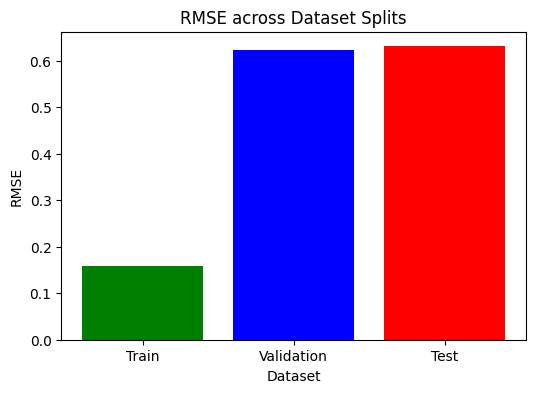

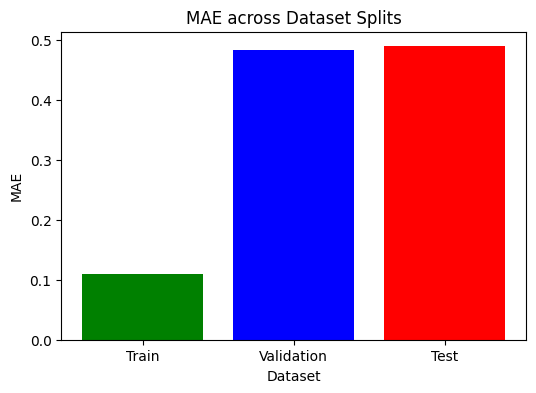

In [56]:
import matplotlib.pyplot as plt

results = {
    "Train": train_metrics,
    "Validation": val_metrics,
    "Test": test_metrics
}

error = ['rmse', 'mae']

for metric in error:
    values = [results[split][metric] for split in results]
    
    plt.figure(figsize=(6, 4))
    plt.bar(results.keys(), values, color=['green', 'blue', 'red'])
    plt.title(f"{metric.upper()} across Dataset Splits")
    plt.ylabel(metric.upper())
    plt.xlabel("Dataset")
    plt.show()


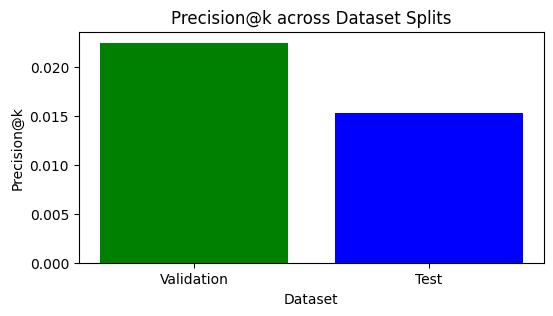

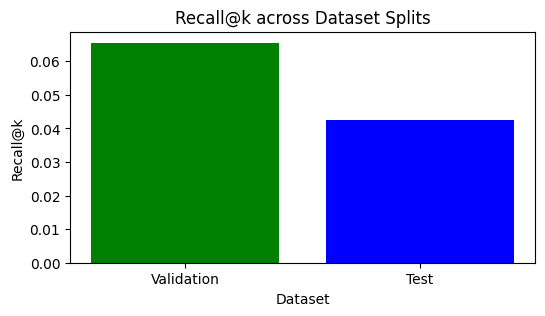

In [ ]:
results = {
    "Validation": val_metrics,
    "Test": test_metrics
}

performance = ['precision@k', 'recall@k']

for metric in performance:
    values = [results[split][metric] for split in results]
    
    plt.figure(figsize=(6, 3))
    plt.bar(results.keys(), values, color=['green', 'blue'])
    plt.title(f"{metric.capitalize()} across Dataset Splits")
    plt.ylabel(metric.capitalize())
    plt.xlabel("Dataset")
    plt.show()


performa jelek
- Data sparse (user banyak, tapi tiap user hanya kasih rating dikit)
- ad yg 1 user cm ks 1 rating, jd pas top k pasti jelek
- Item tidak punya similarity yg tinggi dengan item lain
- User punya sedikit rating di train → prediksi gak punya cukup dasar
- Threshold k terlalu kecil jd banyak item yg relevan ga muncul di rekomen
- Cold start: item/user baru → belum punya cukup informasi

-------

In [12]:
# prediction & evaluation in test set

used_test_rows = 0
predictions = []
actuals = []

for _, row in test_df.iterrows():
    user = row['User ID']
    item = row['Restaurant ID']
    true_rating = row['Rating Normalize']
    
    if user in ratings_matrix_train.index and item in similarity_df.index:
        pred = predict_rating_item_based(user, item, ratings_matrix_train, similarity_df)
        if not np.isnan(pred):
            predictions.append(pred)
            actuals.append(true_rating)
            used_test_rows += 1

print(f"Original test set size: {len(test_df)}")
print(f"Used in evaluation: {used_test_rows}")
print(f"Filtered out: {len(test_df) - used_test_rows}")


Original test set size: 2816
Used in evaluation: 2610
Filtered out: 206


In [15]:
def mae(predictions, actuals):
    return np.mean(np.abs(np.array(predictions) - np.array(actuals)))

def rmse(predictions, actuals):
    return np.sqrt(np.mean((np.array(predictions) - np.array(actuals)) ** 2))

print("MAE:", mae(predictions, actuals))
print("RMSE:", rmse(predictions, actuals))


MAE: 0.48934080092446414
RMSE: 0.6310080087229919


In [35]:
train_preds = []
train_actuals = []

for _, row in train_df.iterrows():
    user = row['User ID']
    item = row['Restaurant ID']
    true_rating = row['Rating Normalize']
    
    if user in ratings_matrix_train.index and item in similarity_df.index:
        pred = predict_rating_item_based(user, item, ratings_matrix_train, similarity_df)
        if not np.isnan(pred):
            train_preds.append(pred)
            train_actuals.append(true_rating)

print("Train RMSE:", rmse(train_preds, train_actuals))
print("Train MAE:", mae(train_preds, train_actuals))


Train RMSE: 0.15954217356669612
Train MAE: 0.10986590260408004


In [25]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

val_predictions = []
val_actuals = []
used_val_rows = 0

for _, row in val_df.iterrows():
    user = row['User ID']
    item = row['Restaurant ID']
    true_rating = row['Rating Normalize']
    
    if user in ratings_matrix_train.index and item in similarity_df.index:
        pred = predict_rating_item_based(user, item, ratings_matrix_train, similarity_df)
        if not np.isnan(pred):
            val_predictions.append(pred)
            val_actuals.append(true_rating)
            used_val_rows += 1

print(f"Validation MAE: {mean_absolute_error(val_predictions, val_actuals)}")
print(f"Validation RMSE: {root_mean_squared_error(val_predictions, val_actuals)}")


Validation MAE: 0.4835192568251938
Validation RMSE: 0.6227350622470237


In [24]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
print("MAE:", mean_absolute_error(actuals, predictions))
print("RMSE:", root_mean_squared_error(actuals, predictions))

MAE: 0.48934080092446414
RMSE: 0.6310080087229919


Compare prediksi top-10 terhadap apa yang user beneran rating di test set\
Untuk setiap user di test set\
Model kasih 10 rekomendasi item yang belum pernah user beri rating sebelumnya (dari train data)\
Ground truth = semua item yang user benar-benar beri rating di test set\
Hit kalau item rekomendasi muncul di daftar rating user di test set

hit rate @10\
Seberapa sering item yang kita rekomendasikan muncul di item yang memang diberi rating oleh user di test set\
top10_acc = hits / total\
hits = jumlah item yang direkomendasikan yang match dengan item di test set user\
total = jumlah total item test set dari user-user yang kamu evaluasi

Misal user 'jos'
Di test set, jos kasih rating untuk restoran ini : ['Gong cha', 'Chatime', 'Burger King']\
Lalu model rekomen top 3 restoran ini : ['Gong cha', 'Starbucks', 'Excelso']\
→ Match = 1 ('Gong cha')

In [18]:
from collections import defaultdict

user_recs = defaultdict(list)
test_truth = defaultdict(list)

for user in test_df['User ID'].unique():
    if user not in ratings_matrix_train.index:
        continue
    rated_in_train = ratings_matrix_train.loc[user]
    unrated_items = rated_in_train[rated_in_train == 0].index
    scores = []
    for item in unrated_items:
        if item not in similarity_df.index:
            continue
        pred = predict_rating_item_based(user, item, ratings_matrix_train, similarity_df)
        if not np.isnan(pred):
            scores.append((item, pred))
    top_10 = sorted(scores, key=lambda x: -x[1])[:10]
    user_recs[user] = [item for item, _ in top_10]
    # ground truth dari test set
    user_test_items = test_df[test_df['User ID'] == user]['Restaurant ID'].tolist()
    test_truth[user] = user_test_items

# Hit rate@10
hits = 0
total = 0
for user in test_truth:
    actual_items = test_truth[user]
    predicted_items = user_recs[user]
    for item in actual_items:
        if item in predicted_items:
            hits += 1
        total += 1
hitrate = hits / total
print("Hit rate@10 : ", hitrate)

# 3m 38s

Hit rate@10 :  0.0444104134762634


In [ ]:
# train top k
train_user_recs = defaultdict(list)
train_truth = defaultdict(list)

for user in train_df['User ID'].unique():
    if user not in ratings_matrix_train.index:
        continue
    rated_in_train = ratings_matrix_train.loc[user]
    unrated_items = rated_in_train[rated_in_train == 0].index
    scores = []
    for item in unrated_items:
        if item not in similarity_df.index:
            continue
        pred = predict_rating_item_based(user, item, ratings_matrix_train, similarity_df)
        if not np.isnan(pred):
            scores.append((item, pred))
    top_10 = sorted(scores, key=lambda x: -x[1])[:10]
    train_user_recs[user] = [item for item, _ in top_10]
    train_truth[user] = train_df[train_df['User ID'] == user]['Restaurant ID'].tolist()

# 

In [ ]:
val_user_recs = defaultdict(list)
val_truth = defaultdict(list)

for user in val_df['User ID'].unique():
    if user not in ratings_matrix_train.index:
        continue
    rated_in_train = ratings_matrix_train.loc[user]
    unrated_items = rated_in_train[rated_in_train == 0].index
    scores = []
    for item in unrated_items:
        if item not in similarity_df.index:
            continue
        pred = predict_rating_item_based(user, item, ratings_matrix_train, similarity_df)
        if not np.isnan(pred):
            scores.append((item, pred))
    top_10 = sorted(scores, key=lambda x: -x[1])[:10]
    val_user_recs[user] = [item for item, _ in top_10]
    val_truth[user] = val_df[val_df['User ID'] == user]['Restaurant ID'].tolist()

# 2m 40s

In [19]:
for user in test_truth:
    actual = test_truth[user]
    predicted = user_recs[user]
    hit_items = [item for item in actual if item in predicted]
    print(f"Username : {user}")
    print(f"  Top 10 result : {predicted}")
    print(f"  Actual        : {actual}")
    print(f"  Hits          : {hit_items}\n")


Username : 415
  Top 10 result : [446, 245, 308, 857, 380, 945, 544, 519, 623, 862]
  Actual        : [861, 988, 861, 159, 861, 970, 385, 849, 635, 893, 582]
  Hits          : []

Username : 1684
  Top 10 result : [41, 738, 581, 257, 152, 99, 753, 731, 464, 995]
  Actual        : [328, 708, 1014, 955, 861, 738, 861, 616]
  Hits          : [738]

Username : 100
  Top 10 result : [1031, 837, 629, 617, 305, 276, 813, 68, 447, 951]
  Actual        : [712]
  Hits          : []

Username : 172
  Top 10 result : [544, 930, 112, 577, 500, 832, 35, 987, 251, 195]
  Actual        : [445, 67]
  Hits          : []

Username : 381
  Top 10 result : [952, 160, 708, 842, 384, 292, 901, 48, 986, 156]
  Actual        : [721, 955, 111, 383, 195, 626, 396, 60, 168, 4, 894, 624, 862, 829, 1013, 48, 357, 717, 1027, 375, 518, 586, 253, 1017, 918, 185, 940, 978, 756, 162, 665, 185, 370, 794, 385, 66, 233, 160, 861, 581, 306, 221, 889, 439, 745, 986, 314, 726]
  Hits          : [48, 160, 986]

Username : 2292

recall@10 = % of relevant items that were recommended

precision@10 = % of top-K recommendations that are correct


In [ ]:
# Precision@10 and Recall@10 for train
k = 10
train_precisions = []
train_recalls = []

for user in train_truth:
    actual_items = set(train_truth[user])
    predicted_items = set(train_user_recs[user][:k])
    hits = actual_items & predicted_items
    if predicted_items:
        train_precisions.append(len(hits) / len(predicted_items))
    if actual_items:
        train_recalls.append(len(hits) / len(actual_items))

train_precision_at_k = np.mean(train_precisions)
train_recall_at_k = np.mean(train_recalls)

print(f"Train Precision@{k}: {train_precision_at_k:.4f}")
print(f"Train Recall@{k}: {train_recall_at_k:.4f}")

In [ ]:
# Precision@10 and Recall@10 for validation
k = 10
val_precisions = []
val_recalls = []

for user in val_truth:
    actual_items = set(val_truth[user])
    predicted_items = set(val_user_recs[user][:k])
    hits = actual_items & predicted_items
    if predicted_items:
        val_precisions.append(len(hits) / len(predicted_items))
    if actual_items:
        val_recalls.append(len(hits) / len(actual_items))

val_precision_at_k = np.mean(val_precisions)
val_recall_at_k = np.mean(val_recalls)

print(f"Validation Precision@{k}: {val_precision_at_k:.4f}")
print(f"Validation Recall@{k}: {val_recall_at_k:.4f}")

Validation Precision@10: 0.0225
Validation Recall@10: 0.0655


In [ ]:
# Precision@10 and Recall@10 for test
k = 10
precisions = []
recalls = []

for user in test_truth:
    actual_items = set(test_truth[user])
    predicted_items = set(user_recs[user][:k])
    num_relevant_and_recommended = len(actual_items & predicted_items)
    if len(predicted_items) > 0:
        precisions.append(num_relevant_and_recommended / len(predicted_items))
    if len(actual_items) > 0:
        recalls.append(num_relevant_and_recommended / len(actual_items))

precision_at_k = np.mean(precisions)
recall_at_k = np.mean(recalls)

print(f"Test Precision@{k}: {precision_at_k:.4f}")
print(f"Test Recall@{k}: {recall_at_k:.4f}")

Test Precision@10: 0.0153
Test Recall@10: 0.0425


Precision at K measures the proportion of relevant items among the top K items.\
Precision shows how many recommendations among the provided ones are relevant. It gives an assessment of prediction “correctness.” It is intuitive and easy to understand: Precision in ranking works the same as its counterpart in classification quality evaluation. 

But there is a rub: Precision values vary depending on the number of relevant items a user has. If there are a total of 3 relevant items – the maximum Precision at ten is capped at 30%. This makes it hard to compare or average Precision across all users in the dataset.

Ultimately, Precision is useful when there are many relevant items for each user, but their attention is limited. For example, you expect hundreds of potential matches, and your goal is to pick the top 5 to show. Precision helps measure how good this shortlist is. 

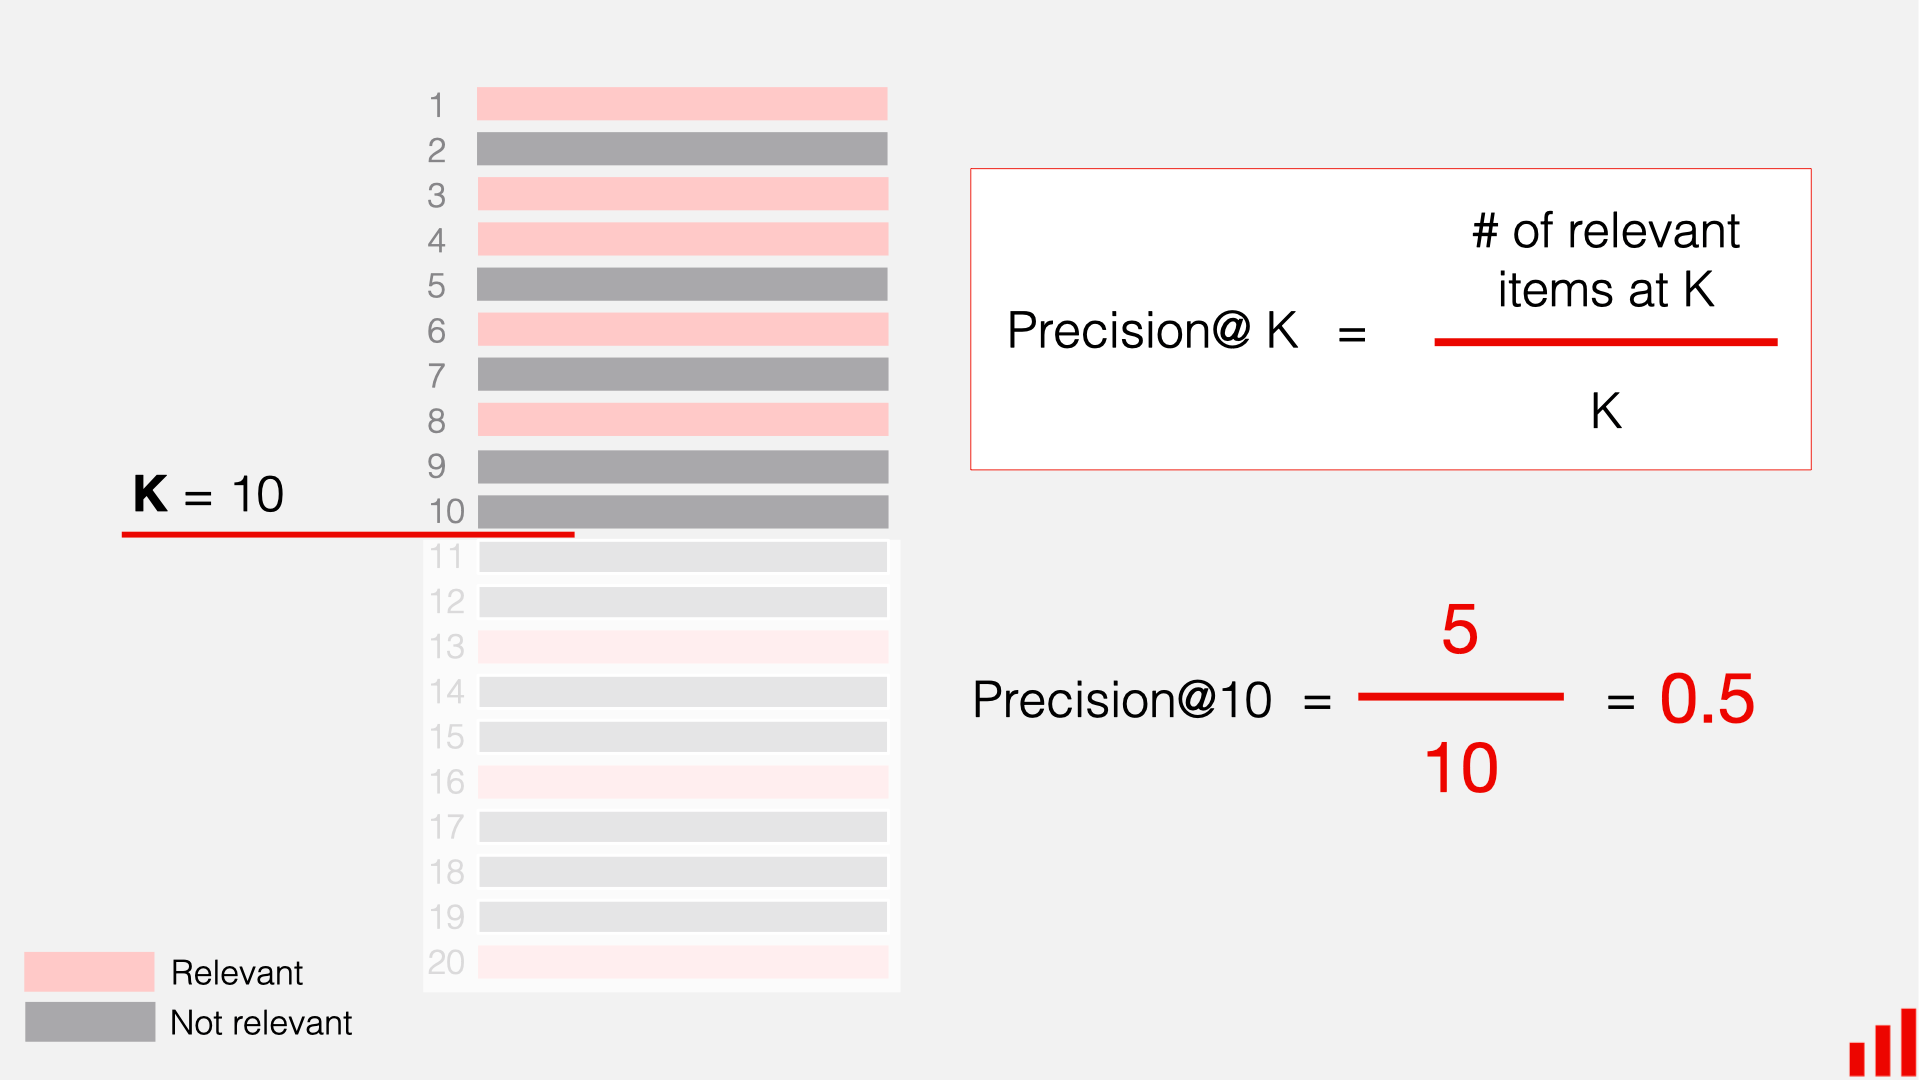

TL;DR. Recall at K measures the coverage of relevant items in the top K.\
Recall at K shows how many relevant items, out of their total number, you can successfully retrieve within the top K recommendations. 

Say there are a total of 8 relevant items in the dataset. If you show five of them in the top-K recommendations, the Recall is 5/8 = 62.5%. 

Recall helps measure coverage: how many relevant items the system captured in the top K. It works well for applications with only a few relevant items, for example, in topic-specific information retrieval. You might expect the system to be able to return all relevant items in the search results, even at the cost of Precision.



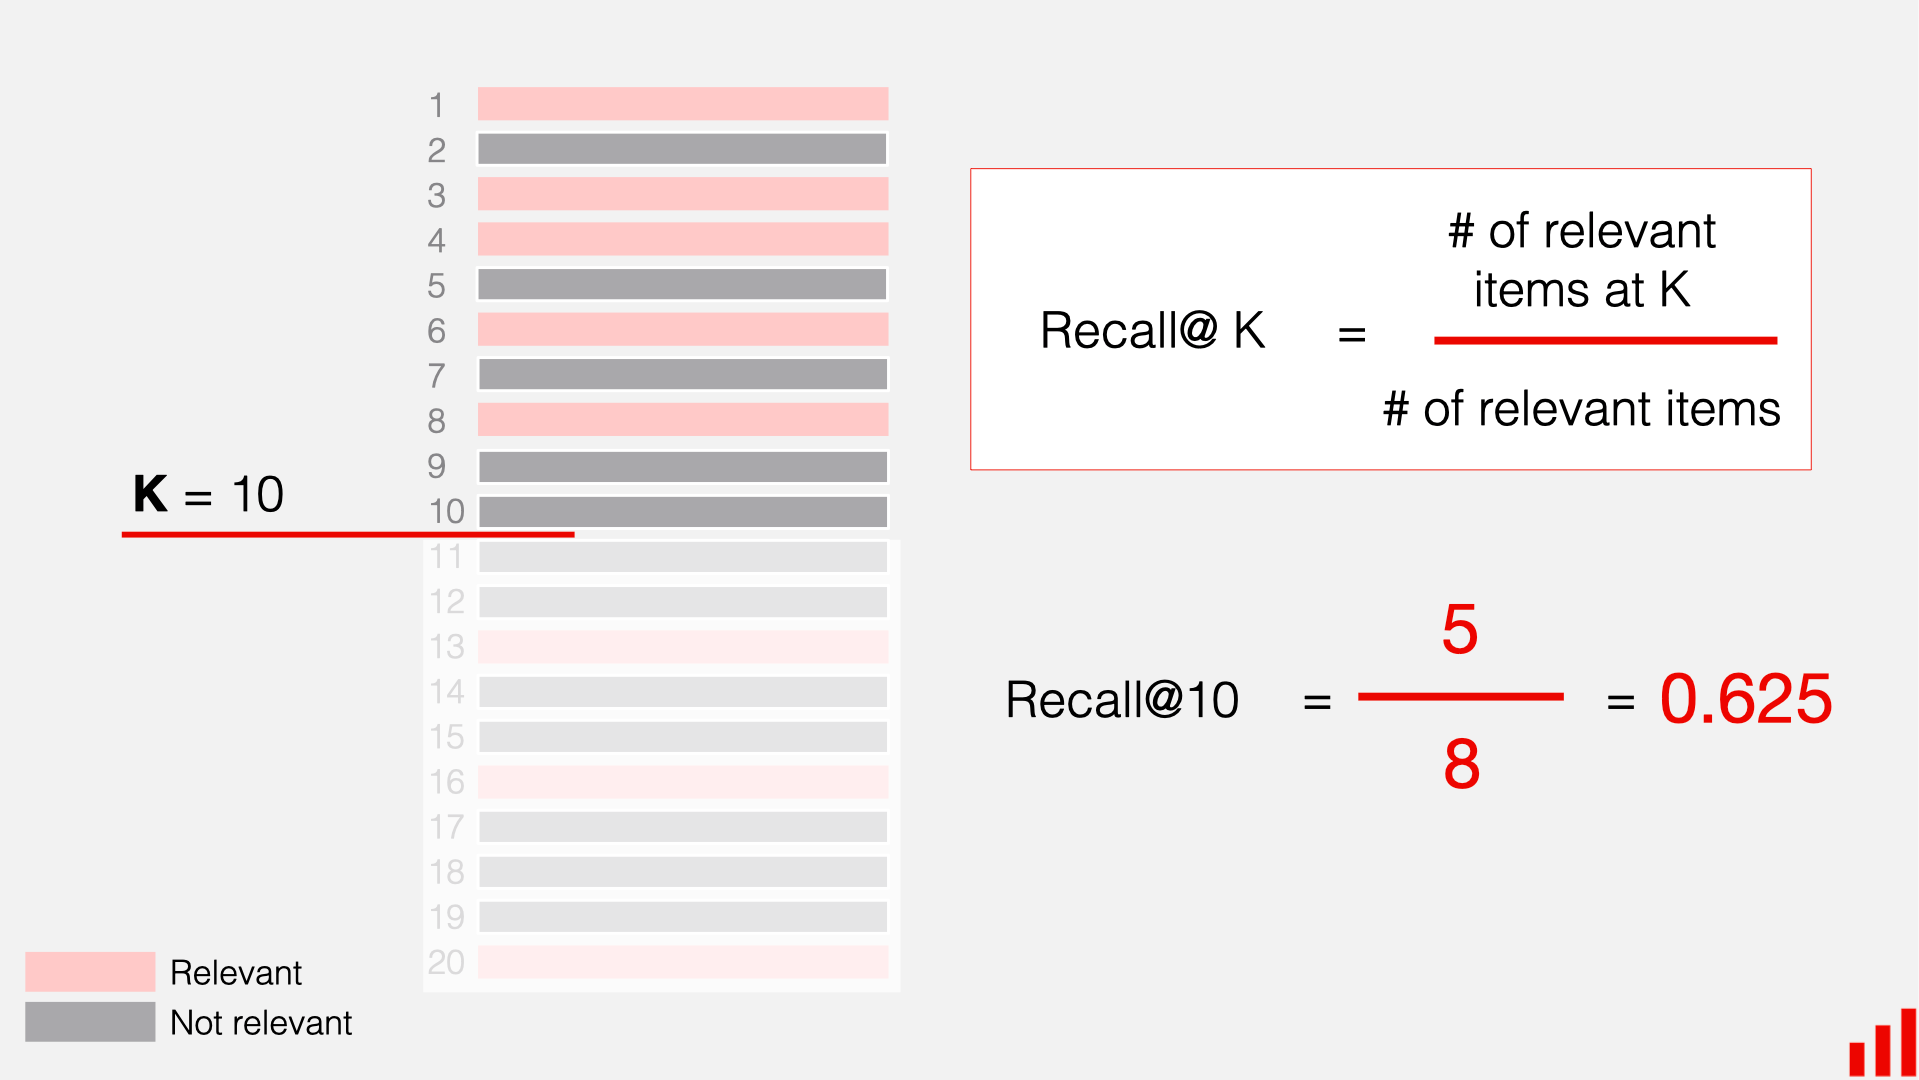

hit rate = 6%\
precision = 2%\
rwcall = 6%

Bs terjadi karena
1) Cold start : banyak item baru atau jarang yang nggak ada di train, jadi gak bisa direkomendasikan
2) Sparsity : karena density data kecil 0.62%, jadi user-item overlap sangat rendah
3) keterbatasan Item-based CF : hanya bisa rekomendasi berdasarkan kemiripan item yang pernah kt rating. Kalau test item beda jauh, gak bisa ke-detect

-> Top-10 kalau item ga masuk top 10, dianggap salah

In [ ]:
rating_data_df = df[['Username', 'Restaurant Name', 'Rating Normalize']].copy()

user_encoder = LabelEncoder()
# resto_encoder = LabelEncoder()

rating_data_df['User ID'] = user_encoder.fit_transform(rating_data_df['Username'])
# rating_data_df['Restaurant ID'] = resto_encoder.fit_transform(rating_data_df['Restaurant Name'])

rating_data_df = rating_data_df[['User ID', 'Restaurant Name', 'Rating Normalize']]
ratings_pivot = rating_data_df.pivot_table(index='User ID', columns='Restaurant Name', values='Rating Normalize').fillna(0)

similarity_matrix = cosine_similarity(ratings_pivot)

similarity_matrix_df = pd.DataFrame(similarity_matrix, index=ratings_pivot.index, columns=ratings_pivot.index)

select_userid = 5
similarities = similarity_matrix_df[select_userid].drop(select_userid)
weights = similarities/similarities.sum()
#num of silimar users
n = 10 
#set a threshold for similarity
user_similarity_threshold =  0.5
# Get top n similar users
similar_users = similarity_matrix_df[similarity_matrix_df[select_userid]>user_similarity_threshold][select_userid].sort_values(ascending=False)[:n]
rated_restaurant = ratings_pivot.loc[ratings_pivot.index== select_userid, ratings_pivot.loc[select_userid,:]>=3]

# restaurant not yet rated by user 5
not_rated = ratings_pivot.loc[ratings_pivot.index!= select_userid, ratings_pivot.loc[select_userid,:]==5]

similarities = similarity_matrix_df[select_userid].drop(select_userid)
weights = similarities/similarities.sum()
weighted_averages = pd.DataFrame(not_rated.T.dot(weights.to_numpy()), columns=["weighted_avg"])

---------

## GA PAKAIi/ catatan

| Penyebab                                               | Penjelasan                                                                                         |
| ------------------------------------------------------ | -------------------------------------------------------------------------------------------------- |
| **Data sangat sparse (0.67%)**                         | Sulit menemukan item yang pernah dirated oleh user yang overlap, jadi similarity rendah atau noisy |
| **Rating matrix di-center per user (adjusted cosine)** | Kalau user cuma kasih 1-2 rating, jadi tidak reliable saat di-center                               |
| **Cold start (user/item)**                             | Banyak user atau item yang cuma muncul sekali, jadi CF gak bisa prediksi                           |
| **Tidak ada pembobotan terhadap jumlah overlap**       | Similaritas dua item tetap tinggi meskipun hanya 1 user yang menilai keduanya                      |
| **Tidak mempertimbangkan urutan waktu**                | Item-based CF hanya lihat matrix saat ini, bukan dinamika                                          |


In [ ]:
#Calucating the density of the rating marix

# given_num_of_ratings = np.count_nonzero(ratings_matrix_train)
# print('given_num_of_ratings = ', given_num_of_ratings)
# possible_num_of_ratings = ratings_matrix_train.shape[0] * ratings_matrix_train.shape[1]
# print('possible_num_of_ratings = ', possible_num_of_ratings)
# density = (given_num_of_ratings/possible_num_of_ratings)
# density *= 100
# print ('density: {:4.2f}%'.format(density))

In [ ]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

data['Username'] = user_encoder.fit_transform(data['Username'])
data['Restaurant Name'] = item_encoder.fit_transform(data['Restaurant Name'])


![Screenshot 2025-06-03 at 15.42.26.png](<attachment:Screenshot 2025-06-03 at 15.42.26.png>)
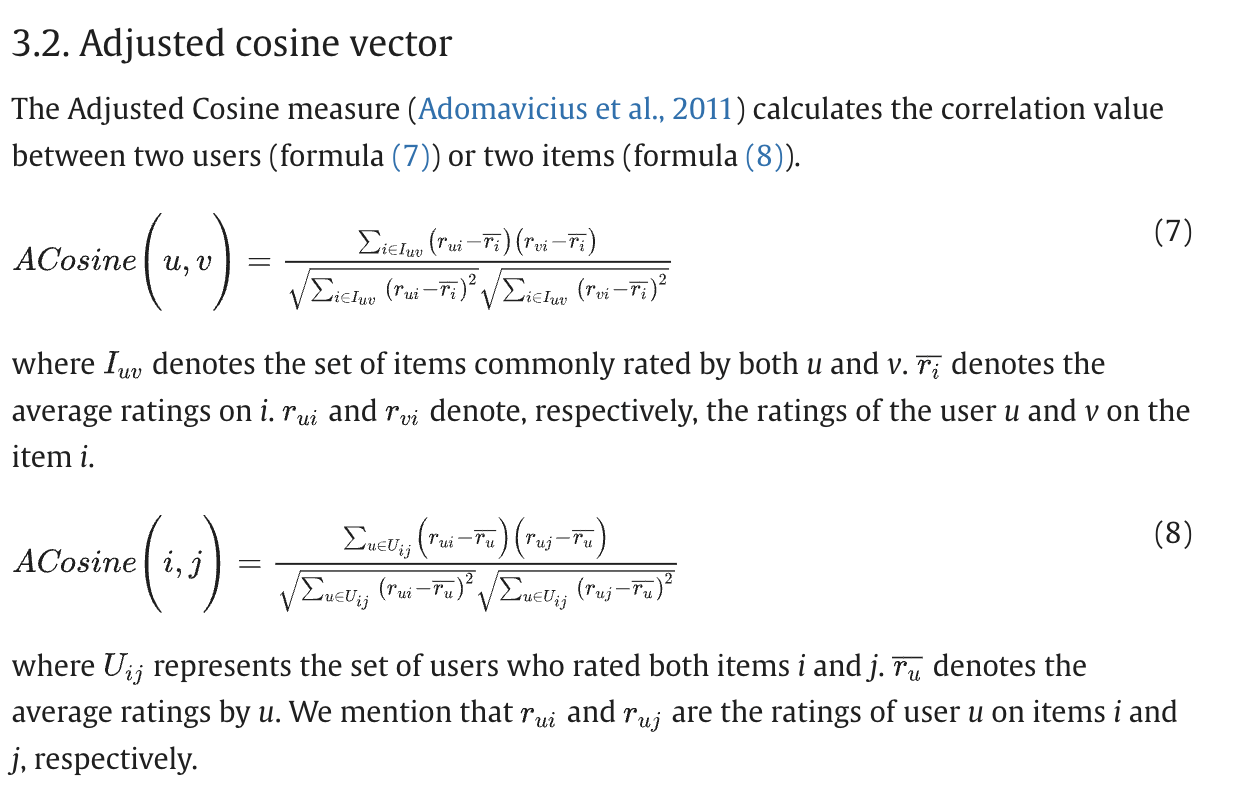

In [ ]:
# pivot
ratings_matrix = data.pivot_table(index='Username', columns='Restaurant Name', values='User Rating').fillna(0)

https://www.sciencedirect.com/science/article/pii/S1319157821002652?ref=pdf_download&fr=RR-2&rr=8d5fc7538b15ce79

In [ ]:
# Adjusted Cosine Similarity (Centering User Ratings)
ratings_matrix = ratings_matrix.sub(ratings_matrix.mean(axis=1), axis=0)

In [ ]:
# Convert to sparse matrix for efficiency
sparse_matrix = csr_matrix(ratings_matrix.T.values)  # Transpose untuk item-based CF
similarity_matrix = cosine_similarity(sparse_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=ratings_matrix.columns, columns=ratings_matrix.columns)

In [ ]:
# Weighted Sum for Recommendation
def get_recommendations(restaurant, top_n=10):
    if restaurant not in similarity_df.index:
        return []
    similar_restaurants = similarity_df[restaurant].sort_values(ascending=False)[1:top_n+1]
    return similar_restaurants.index.tolist()

In [ ]:
# Example Usage
# user_input = 'UKI Matcha'
user_input = input("Enter a restaurant name: ")
recommendations = get_recommendations(user_input)
print(f"Top recommendations for {user_input}: {recommendations}")

In [ ]:
print(similarity_df.shape)  
# (jumlah_restoran, jumlah_restoran)

In [ ]:
similarity_df

In [ ]:
print(similarity_df.loc[user_input].sort_values(ascending=False).head(10))

In [ ]:
print(user_input in similarity_df.index)  # Harus True
print(similarity_df.index)  # Lihat daftar restoran

Performance Eval

In [ ]:
recommended_restaurants = get_recommendations(user_input)
# actual rating from users who rated that restaurant
actual_ratings = ratings_matrix[user_input].dropna()
# predict rating using mean avg of recommended resto
predictions = ratings_matrix[recommended_restaurants].mean(axis=1).dropna()
# actual rating from users who also give rating to the recommended resto
actuals = actual_ratings.loc[predictions.index]

In [ ]:
def mean_absolute_error(predictions, actuals):
    return np.mean(np.abs(predictions - actuals))

def root_mean_squared_error(predictions, actuals):
    return np.sqrt(np.mean((predictions - actuals) ** 2))

def top_k_accuracy(predicted, actual, k=10):
    # predicted: list of predicted item IDs ordered by relevance
    # actual: list of actual relevant item IDs (ground truth)
    correct_predictions = sum([1 for r in actual if r in predicted[:k]])
    return correct_predictions / min(len(actual), k)

# MAE
mae = mean_absolute_error(predictions, actuals)
print(f"MAE for {user_input}: {mae}")

# RMSE
rmse = root_mean_squared_error(predictions, actuals)
print(f"RMSE for {user_input}: {rmse}")

# Top-K Accuracy
top_k_acc = top_k_accuracy(recommended_restaurants, actuals.index, k=10)
print(f"Top-10 Accuracy for {user_input}: {top_k_acc}")

In [ ]:
print("Recommended:", recommended_restaurants)
print("Actual:", list(actuals.index))


## Note

Note : \
ada 1 restoran yg isinya 44 review tp ditulis oleh orang yang sama trs\
meskipun semua reviewnya beda2 sih\
Waroeng Aceh Kemang